In [15]:
!pip install tensorflow keras matplotlib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Corrected base directory path to include the trailing space as per os.listdir output
base_dir = '/content/drive/MyDrive/DATA SET/Alzheimer _MRI_Dataset '

# Directories for train and test sets
train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

# Define image dimensions and batch size
IMG_HEIGHT = 150
IMG_WIDTH  = 150
BATCH_SIZE = 32

# Data augmentation and splitting the training data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of training data for validation
)

# For the test set, only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training generator (using 80% of the data)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify this is the training subset
)

# Create the validation generator (using 20% of the data)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Specify this is the validation subset
)

Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes, so 4 output neurons with softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model for multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 2632s 10s/step - accuracy: 0.2685 - loss: 1.3848 - val_accuracy: 0.6094 - val_loss: 0.9793
Epoch 2/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.5986 - loss: 0.9135 - val_accuracy: 0.6934 - val_loss: 0.6329
Epoch 3/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 534s 2s/step - accuracy: 0.6733 - loss: 0.6967 - val_accuracy: 0.6919 - val_loss: 0.6235
Epoch 4/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.7157 - loss: 0.6160 - val_accuracy: 0.7007 - val_loss: 0.6017
Epoch 5/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.7372 - loss: 0.5800 - val_accuracy: 0.7075 - val_loss: 0.5542
Epoch 6/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.7414 - loss: 0.5695 - val_accuracy: 0.6621 - val_loss: 0.6642
Epoch 7/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.7547 - loss: 0.5432 - val_accuracy: 0.6802 - val_loss: 0.5891
Epoch 8/15
256/256 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.7412 - loss: 0.5490 - val_ac

In [25]:
# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Found 1279 images belonging to 4 classes.
39/39 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - accuracy: 0.6102 - loss: 0.8468
Test Accuracy: 60.82%


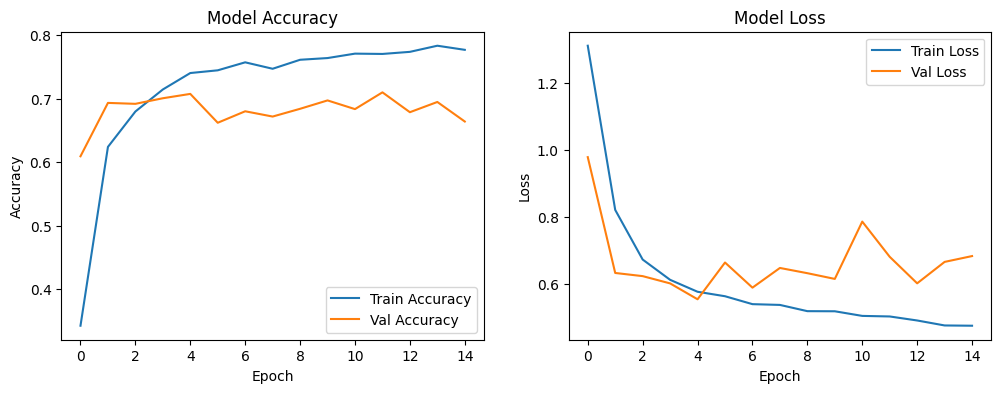

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 539ms/step
Length of y_true: 1279
Length of y_pred: 1279
Type of y_true: <class 'numpy.ndarray'>, Shape of y_true: (1279,)
Type of y_pred: <class 'numpy.ndarray'>, Shape of y_pred: (1279,)
Sample of y_true: [3 0 2 3 3 2 2 2 0 2]
Sample of y_pred: [0 3 2 2 2 2 2 3 3 0]
Confusion Matrix
[[ 27   0  90  62]
 [  2   0   6   4]
 [142   3 286 209]
 [ 71   2 223 152]]


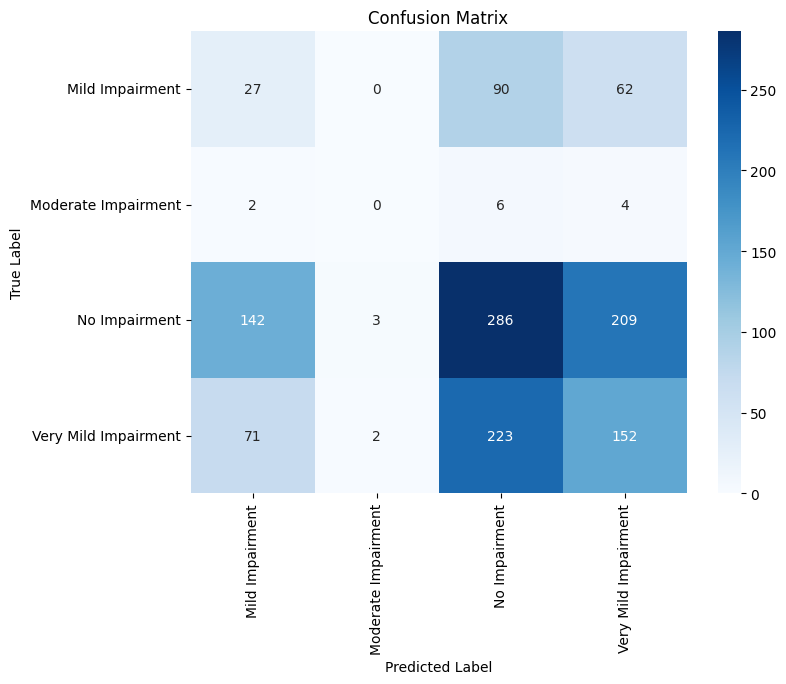


Classification Report
                    precision    recall  f1-score   support

     Mild_Demented       0.11      0.15      0.13       179
 Moderate_Demented       0.00      0.00      0.00        12
      Non_Demented       0.47      0.45      0.46       640
Very_Mild_Demented       0.36      0.34      0.35       448

          accuracy                           0.36      1279
         macro avg       0.24      0.23      0.23      1279
      weighted avg       0.38      0.36      0.37      1279



In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the test set
Y_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels in the correct order
y_true = test_generator.classes[test_generator.index_array]

# Print the lengths of y_true and y_pred to diagnose the issue
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred: {len(y_pred)}")

# Print the data types and shapes to further diagnose
print(f"Type of y_true: {type(y_true)}, Shape of y_true: {y_true.shape}")
print(f"Type of y_pred: {type(y_pred)}, Shape of y_pred: {y_pred.shape}")
print(f"Sample of y_true: {y_true[:10]}")
print(f"Sample of y_pred: {y_pred[:10]}")


# Ensure y_pred has the same length as y_true
y_pred = y_pred[:len(y_true)]

# Display the confusion matrix
print("Confusion Matrix")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print("\nClassification Report")
# Ensure these class names match the folder names in your dataset
target_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
print(classification_report(y_true, y_pred, target_names=target_names))

In [28]:
#save model
model.save('Alzheimer_model.keras')
print('Model saved as Alzheimer_model.keras')

Model saved as Alzheimer_model.keras


In [29]:
from google.colab import files

# Assuming your model was saved as 'Alzheimer_model.keras'
model_filename = 'Alzheimer_model.keras'

try:
    files.download(model_filename)
    print(f"Downloading {model_filename}...")
except Exception as e:
    print(f"Error downloading file: {e}")
    print("Please ensure the file exists at the root of your Colab environment or provide the full path.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>